In [1]:
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Vibrating String 

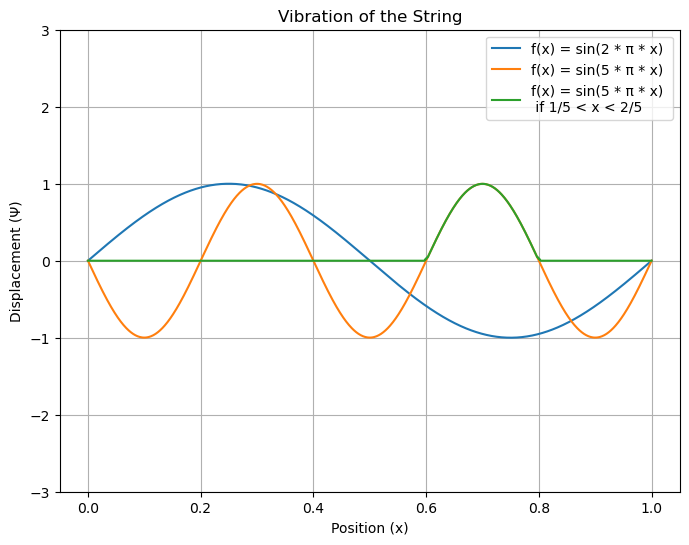

In [2]:


class VibratingString:
    def __init__(self, L, N, c, dt, T_max, f_list, function_dict):
        self.L = L
        self.N = N
        self.c = c
        self.dt = dt
        self.T_max = T_max
        self.dx = L / N
        self.num_time_steps = int(T_max / dt)
        self.x = np.linspace(0, L, N+1)
        self.Psi_list = [np.zeros(N+1) for _ in f_list]
        self.Psi_old_list = [np.zeros(N+1) for _ in f_list]
        self.Psi_new_list = [np.zeros(N+1) for _ in f_list]
        self.f_list = f_list
        self.g = lambda x: 0.0
        self.initialize_conditions()
        self.function_dict = function_dict

    def initialize_conditions(self):
        for f, Psi, Psi_old in zip(self.f_list, self.Psi_list, self.Psi_old_list):
            for i in range(self.N+1):
                Psi[i] = f(self.x[i])
                Psi_old[i] = Psi[i] - self.dt * self.g(self.x[i])

    def update(self, n):
        for Psi, Psi_old, Psi_new in zip(self.Psi_list, self.Psi_old_list, self.Psi_new_list):
            for i in range(1, self.N):
                Psi_new[i] = 2 * Psi[i] - Psi_old[i] + (self.c**2 * self.dt**2 / self.dx**2) * (Psi[i+1] - 2*Psi[i] + Psi[i-1])
            Psi_old[:], Psi[:] = Psi[:], Psi_new[:]
            Psi[0] = 0
            Psi[self.N] = 0
        for line, Psi in zip(self.lines, self.Psi_list):
            line.set_ydata(Psi)
        return self.lines

    def animate(self):
        fig, ax = plt.subplots(figsize=(8, 6))
        self.lines = [ax.plot(self.x, Psi, label=f"f(x) = {function_text[f]}")[0] for f, Psi in zip(self.f_list, self.Psi_list)]
        ax.set_title("Vibration of the String")
        ax.set_xlabel("Position (x)")
        ax.set_ylabel("Displacement (Ψ)")
        ax.grid(True)
        ax.set_ylim(-3, 3)
        ax.legend()
        ani = FuncAnimation(fig, self.update, frames=self.num_time_steps, interval=50, blit=True)
        ani.save('vibration_of_string_verlet_multiple_f.gif', writer='pillow', fps=500)
        plt.show()

# initial functions
f1 = lambda x: np.sin(2 * np.pi * x)
f2 = lambda x: np.sin(5 * np.pi * x)
f3 = lambda x: np.sin(5 * np.pi * x) if (1/5 < x < 2/5) else 0
function_text = {f1: "sin(2 * π * x)", f2: "sin(5 * π * x)", f3: "sin(5 * π * x) \n if 1/5 < x < 2/5"}


vibrating_string = VibratingString(L=1, N=1000, c=1, dt=0.001, T_max=5, f_list=[f1, f2, f3], function_dict= function_text)
vibrating_string.animate()